In [88]:
#Social_Network_Ads.csv

**Importing the libraries**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [90]:
df = pd.read_csv('Social_Network_Ads.csv') 

In [91]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [92]:
df['Gender'] = df['Gender'].replace('Male',1)
df['Gender'] = df['Gender'].replace('Female',0)

**Splitting the dataset into the Training set and Test set**

In [93]:
X=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [95]:
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [97]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [98]:
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np
from sklearn.metrics import roc_auc_score,accuracy_score
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
    dt.fit(X_train, y_train) # the model is trained
    trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
    dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7827827827827829  Cross val score :  0.8133333333333332
Depth  :  2  Training Accuracy :  0.9155584155584156  Cross val score :  0.9
Depth  :  3  Training Accuracy :  0.9134134134134135  Cross val score :  0.89
Depth  :  4  Training Accuracy :  0.9303589303589304  Cross val score :  0.8933333333333333
Depth  :  5  Training Accuracy :  0.9364364364364365  Cross val score :  0.8866666666666667
Depth  :  6  Training Accuracy :  0.9563134563134563  Cross val score :  0.86
Depth  :  7  Training Accuracy :  0.9597454597454598  Cross val score :  0.8566666666666667
Depth  :  8  Training Accuracy :  0.9721864721864723  Cross val score :  0.8466666666666667
Depth  :  9  Training Accuracy :  0.9766909766909766  Cross val score :  0.8433333333333334
Depth  :  10  Training Accuracy :  0.9928499928499929  Cross val score :  0.8366666666666667
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.8566666666666667


In [99]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc_score(y_test,y_pred)

0.9090073529411765

In [100]:
confusion_matrix(y_test,y_pred)

array([[62,  6],
       [ 3, 29]])

**Visualising the Training set results**

**Visualising the Test set results**

In [101]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

In [102]:
X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


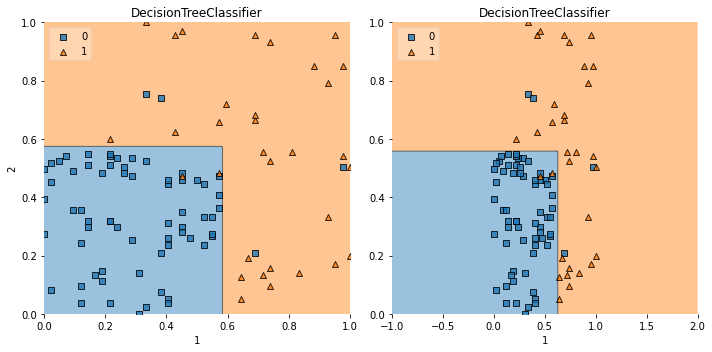

In [107]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=2)
X_train = X_train.loc[:,[1, 2]]
X_test = X_test.loc[:,[1, 2]]
dt=dt.fit(X_train, y_train)

# # Instantiate logreg
# logreg = LogisticRegression(random_state=1)
# logreg.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(max_depth=2)
X_train = X_train.loc[:,[1, 2]]
X_test = X_test.loc[:,[1, 2]]
dt2=dt2.fit(X_test, y_test)

clfs = [dt2, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)